### Import your libraries

In [45]:
import pandas as pd
import numpy as np

### Load your dataset

In [46]:
data = pd.read_csv("HR_Missing_Vslues.csv")

### Explore your data 

* First 5 recods
* Last 5 records 
* Check data type
* Show statistical summary 
* Is there any missing values ?
* Applay two more data analysis from your choose 

In [47]:
print(data.head())

              Employee_Name  EmpID    Salary  PositionID  \
0       Adinolfi, Wilson  K  10026   62506.0          19   
1  Ait Sidi, Karthikeyan     10084  104437.0          27   
2         Akinkuolie, Sarah  10196   64955.0          20   
3              Alagbe,Trina  10088   64991.0          19   
4                       NaN  10069   50825.0          19   

                   Position       DOB Sex MaritalDesc RaceDesc DateofHire  \
0   Production Technician I  07/10/83  M       Single    White   7/5/2011   
1                   Sr. DBA  05/05/75  M      Married    White  3/30/2015   
2  Production Technician II  09/19/88   F     Married    White   7/5/2011   
3   Production Technician I       NaN   F     Married    White   1/7/2008   
4   Production Technician I  09/08/89   F    Divorced    White  7/11/2011   

  DateofTermination         Department     ManagerName  ManagerID  \
0               NaN  Production         Michael Albert       22.0   
1         6/16/2016              IT/IS

In [48]:
print(data.tail())

          Employee_Name  EmpID    Salary  PositionID  \
306      Woodson, Jason  10135   65893.0          20   
307  Ybarra, Catherine   10301   48513.0          19   
308                 NaN  10010  220450.0           6   
309         Zhou, Julia  10043   89292.0           9   
310                 NaN  10271   45046.0          19   

                     Position       DOB Sex MaritalDesc RaceDesc DateofHire  \
306  Production Technician II  05/11/85  M       Single    White   7/7/2014   
307   Production Technician I       NaN   F      Single    Asian   9/2/2008   
308                       CIO       NaN   F      Single    White  4/10/2010   
309              Data Analyst  02/24/79   F      Single    White  3/30/2015   
310   Production Technician I  08/17/78   F     Widowed    Asian  9/29/2014   

    DateofTermination         Department     ManagerName  ManagerID  \
306               NaN  Production         Kissy Sullivan       20.0   
307         9/29/2015  Production         Bran

In [49]:
print(data.dtypes)

Employee_Name         object
EmpID                  int64
Salary               float64
PositionID             int64
Position              object
DOB                   object
Sex                   object
MaritalDesc           object
RaceDesc              object
DateofHire            object
DateofTermination     object
Department            object
ManagerName           object
ManagerID            float64
RecruitmentSource     object
Absences             float64
dtype: object


In [50]:
print(data.describe())

              EmpID         Salary  PositionID   ManagerID    Absences
count    311.000000     249.000000  311.000000  303.000000  280.000000
mean   10156.000000   67972.662651   16.845659   14.570957   10.128571
std       89.922189   22995.908395    6.223419    8.078306    5.946407
min    10001.000000   45046.000000    1.000000    1.000000    1.000000
25%    10078.500000   55315.000000   18.000000   10.000000    4.750000
50%    10156.000000   62957.000000   19.000000   15.000000   10.000000
75%    10233.500000   71707.000000   20.000000   19.000000   15.250000
max    10311.000000  220450.000000   30.000000   39.000000   20.000000


In [51]:
print(data.isnull().sum())

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64


### Two more data analysis of my choice

### Group data by a specific column and display the mean

In [52]:
print(data.groupby('Sex').mean())

            EmpID        Salary  PositionID  ManagerID   Absences
Sex                                                              
F    10151.985816  66265.426087   17.425532  14.977941  10.046875
M    10155.453704  69337.506329   16.777778  13.500000   9.968750


### Create a histogram of a specific column

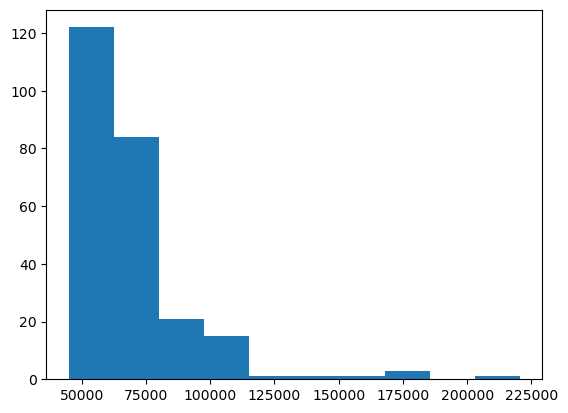

In [53]:
import matplotlib.pyplot as plt
plt.hist(data['Salary'])
plt.show()

### Do the following steps for each column with missing values.

* Identity the column 
* How much precentage the missing value represents 
* What is the best way to handle these missing values and why
* Apply yourr method to the column

In [54]:
for col in missing_cols:
    print(col)

Employee_Name
Salary
DOB
Sex
DateofTermination
ManagerID
Absences


In [55]:
for col in missing_cols:
    percent_missing = data[col].isnull().mean()*100
    print(f"{col} has {percent_missing:.2f}% missing values")

Employee_Name has 29.90% missing values
Salary has 19.94% missing values
DOB has 9.97% missing values
Sex has 19.94% missing values
DateofTermination has 66.56% missing values
ManagerID has 2.57% missing values
Absences has 9.97% missing values


### There are several ways to handle missing values such as:

Droping rows or columns or both. 
Using machine learning to predict the values of the missing values. 
Using random values between the max and low of the specific column. 
Using Average values of the column in question. 

However, it is ultimately ((depends)) on what is the data scientist is trying to analyze. For instance, if the goal of the data science project is to analyze the salary per employee name to find there are any biases towards certain names, then a simple dropping of the Employee_name missing values is the right method in this case. This is due to the fact it would not make sense to randomly choosing names. Converserly, if the goal is to find the average salary per position then dropping the employee_name missing rows is the wrong method to do. 

### I choose to only drop the salary column missing values to achieve my following analysis goal of determing the average salary per position : 

In [56]:
df = data
df["Salary"].dropna(inplace=True)
df.isnull().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [57]:
df.groupby("Position").agg({"Salary": ["mean", "sum","min", "max"]})

Salary                               
                                       mean        sum       min       max
Position                                                                  
Accountant I                   63507.666667   190523.0   63000.0   64520.0
Administrative Assistant       52280.000000   156840.0   49920.0   55000.0
Area Sales Manager             64245.272727  1413396.0   55875.0   74326.0
BI Developer                   95465.000000   381860.0   90100.0   99020.0
BI Director                   110929.000000   110929.0  110929.0  110929.0
CIO                           220450.000000   220450.0  220450.0  220450.0
Data Analyst                   89932.571429   629528.0   83552.0   93554.0
Data Analyst                            NaN        0.0       NaN       NaN
Data Architect                          NaN        0.0       NaN       NaN
Database Administrator        107124.750000   428499.0   97999.0  114800.0
Director of Operations        170500.000000   170500.0  170500.0  170500.0
Director of Sales             180000.000000   180000.0  180000.0  180000.0
Enterprise Architect                    NaN        0.0       NaN       NaN
IT Director                   178000.000000   178000.0  178000.0  178000.0
IT Manager - DB                         NaN        0.0       NaN       NaN
IT Manager - Infra            157000.000000   157000.0  157000.0  157000.0
IT Manager - Support          138888.000000   138888.0  138888.0  138888.0
IT Support                     65431.750000   261727.0   51777.0   74679.0
Network Engineer               61605.000000   308025.0   50750.0   76029.0
President & CEO                         NaN        0.0       NaN       NaN
Principal Data Architect      120000.000000   120000.0  120000.0  120000.0
Production Manager             74398.454545   818383.0   62957.0   83667.0
Production Technician I        55534.357143  6219848.0   45046.0   64991.0
Production Technician II       64818.333333  2916825.0   55315.0   74813.0
Sales Manager                  69240.000000   207720.0   65729.0   72992.0
Senior BI Developer            81584.000000    81584.0   81584.0   81584.0
Shared Services Manager                 NaN        0.0       NaN       NaN
Software Engineer              97088.444444   873796.0   83363.0  108987.0
Software Engineering Manager   77692.000000    77692.0   77692.0   77692.0
Sr. Accountant                102859.000000   205718.0   99351.0  106367.0
Sr. DBA                       104437.000000   104437.0  104437.0  104437.0
Sr. Network Engineer           93256.250000   373025.0   85028.0  107226.0

In [58]:
df

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN


In [59]:
print(data.head())

              Employee_Name  EmpID    Salary  PositionID  \
0       Adinolfi, Wilson  K  10026   62506.0          19   
1  Ait Sidi, Karthikeyan     10084  104437.0          27   
2         Akinkuolie, Sarah  10196   64955.0          20   
3              Alagbe,Trina  10088   64991.0          19   
4                       NaN  10069   50825.0          19   

                   Position       DOB Sex MaritalDesc RaceDesc DateofHire  \
0   Production Technician I  07/10/83  M       Single    White   7/5/2011   
1                   Sr. DBA  05/05/75  M      Married    White  3/30/2015   
2  Production Technician II  09/19/88   F     Married    White   7/5/2011   
3   Production Technician I       NaN   F     Married    White   1/7/2008   
4   Production Technician I  09/08/89   F    Divorced    White  7/11/2011   

  DateofTermination         Department     ManagerName  ManagerID  \
0               NaN  Production         Michael Albert       22.0   
1         6/16/2016              IT/IS